# SIIM-ACR Pneumothorax Segmentation
<b>Identify Pneumothorax disease in chest x-rays<br>

# Introduction

<b> What Is a Collapsed Lung (Pneumothorax)?</b> <br>
A collapsed lung or pneumothorax refers to a condition in which the space between the wall of the chest cavity and the lung itself fills with air, causing all or a portion of the lung to collapse. Air usually enters this space, called the pleural space, through an injury to the chest wall or a hole in the lung. This result is called a pneumothorax, which is the medical term for a collapsed lung.


<b> What Causes a Collapsed Lung?</b> <br>
Causes of collapsed lung include trauma to the chest cavity (fractured rib, penetrating trauma from a bullet, knife, or other sharp object), cigarette smoking, drug abuse, and certain lung diseases. Sometimes, the lung may collapse without an apparent injury, called spontaneous pneumothorax.


<b> What Are the Signs and Symptoms of a Collapsed Lung?</b><br>
Symptoms of collapsed lung include sharp, stabbing chest pain that worsens on breathing or with deep inhalation that often radiates to the shoulder and or back; and a dry, hacking cough. In severe cases a person may go into shock, which is a life-threatening condition that requires immediate medical treatment. See a doctor for any type of chest pain or suspected pneumothorax.


<b> How Is a Collapsed Lung Treated?</b> <br>
A small pneumothorax without underlying lung disease may resolve on its own in one to two weeks.however a large Pneumothorax is usually treated with removal of air under pressure, by inserting a needle attached to a syringe into the chest cavity. A chest tube may be used and left in place for several days. In some cases, surgery may be needed.

<b>Who is at risk for pneumothorax?</b><br>
<ul>
<li> Sometimes, very tall, thin people are prone to a spontaneous pneumothorax. In this condition, the lung collapses after minimal or no trauma.</li>
<li> Spontaneous pneumothorax is more common in men. Smoking has been shown to increase the risk for spontaneous pneumothorax.</li></ul>

<b> Reference </b> https://www.emedicinehealth.com/collapsed_lung/article_em.htm

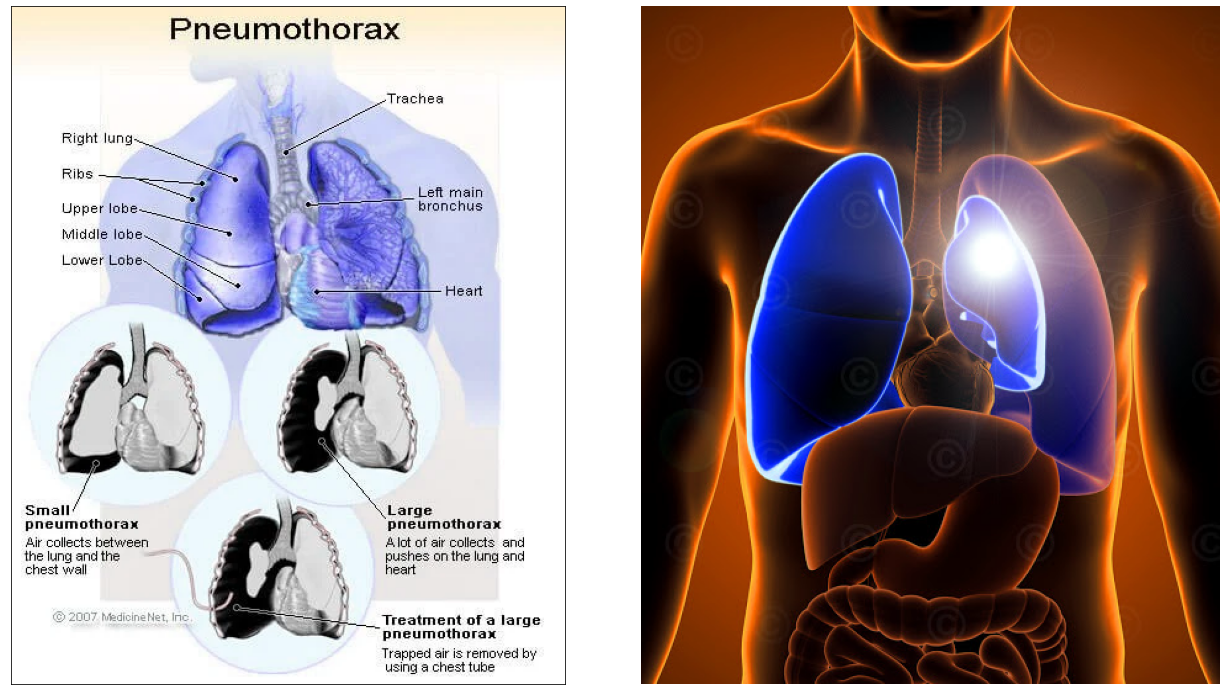

In [ ]:
import cv2
# Read RGB image
img1 = cv2.imread('./pneumothorax.png')
img2 = cv2.imread('./pneumothorax2.png')
fig, ax = plt.subplots(1, 2, figsize=(18,10))
ax[0].imshow(img1)
ax[1].imshow(img2)
plt.tight_layout()
plt.axis('off')
for i in range(2):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

<b> Image Courtesy :</b> http://www.medicalgraphics.de/en/projects/list-of-projects/projects-2018/cover-illustration-pneumothorax.html<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;https://www.medicinenet.com/pneumothorax/article.htm

<h1>Business/Real-world Problem

Imagine suddenly gasping for air, helplessly breathless for no apparent reason. Could it be a collapsed lung?

Pneumothorax can be caused by a blunt chest injury, damage from underlying lung disease, or most horrifying—it may occur for no obvious reason at all. On some occasions, a collapsed lung can be a life-threatening event.

Pneumothorax is usually diagnosed by a radiologist on a chest x-ray, and can sometimes be very difficult to confirm. An accurate AI algorithm to detect pneumothorax would be useful in a lot of clinical scenarios. AI could be used to triage chest radiographs for priority interpretation, or to provide a more confident diagnosis for non-radiologists.

The Society for Imaging Informatics in Medicine (SIIM) is the leading healthcare organization for those interested in the current and future use of informatics in medical imaging. Their mission is to advance medical imaging informatics across the enterprise through education, research, and innovation in a multi-disciplinary community. 

In this competition, we’ll develop a model to classify (and if present, segment) pneumothorax from a set of chest radiographic images. If successful, you could aid in the early recognition of pneumothoraces and save lives.<br>It requires a lot of effort to determine certain cases of Pneumothorax where the affected area is minimal and it also requires good domain experts. So having an AI enabled system  will help radiologists by reducing the time required to run diagnostic tests and also reduce the chances of errors. The algorithm had to be extremely accurate because lives of people is at stake.


<b>Source: </b>https://www.kaggle.com/c/siim-acr-pneumothorax-segmentation/overview



<h1> Real-world/Business objectives and constraints.

Objectives:
<ul>
 <li>We need to predict pneumothorax from a set of chest radiographic images and if it is present we need to segment that also</li>
<li> Minimize Dice coefficient.</li></ul>
<pre>Constraints:
1. Since it's a medical domain problem so predicting False Negatives is a big issue.
2. No strict latency constraints.

<h1>  Data Overview

Originally the data set was available to download using Google Cloud Healthcare AP. The API is not currently functional since most people have already shared it.Thanks to [See--](https://www.kaggle.com/seesee/siim-train-test) for making the data easily accessable. After we download the dataset, it is important to understand the hierarchy or folder structure of the images.

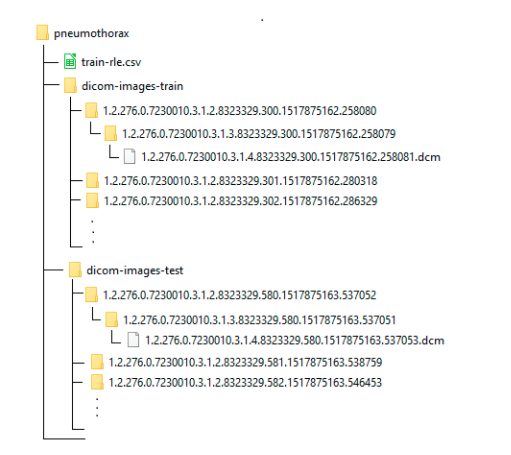

In [ ]:
Image("folder_structure.PNG") 

Image Courtesy : https://www.kaggle.com/retyidoro<br>We have images separated in a test and train folder, train-rle.csv is the class label file. <br>



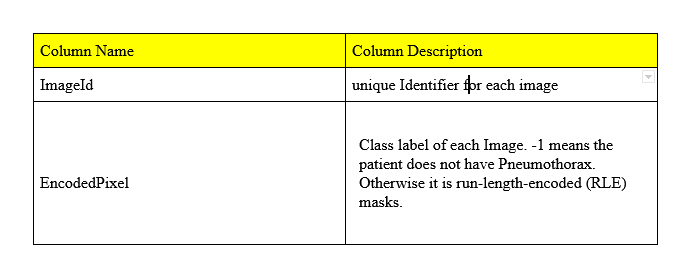

The format of images is .dcm format. We need to understand the terminology below to solve the problem.
.

<b>What is the DICOM format?</b>

DICOM is an abbreviation for Digital Imaging and Communications in Medicine. It is a standard format for storing, printing and transmitting information in medical imaging. This format is used worldwide. DICOM format is represented as ".dcm".

Source: https://www.dicomlibrary.com/dicom/

<b>What does DICOM format contain?</b>

DICOM contains image data along with other important information about the patent demographics, and study parameters such as patient name, patient id, patient age and patient weight. For confidentiality purposes, all information that identifies the patient is removed before transmitting it for educational or research purposes.

Source: Varma DR. Managing DICOM images: Tips and tricks for the radiologist. Indian J Radiol Imaging [serial online] 2012 [cited 2019 Aug 23];22:4-13. Available from: http://www.ijri.org/text.asp?2012/22/1/4/95396

<b>How to read and extract data from DICOM format in python?</b>

You can read DICOM files in python using pydicom library.<br>

Source https://pydicom.github.io/

<b>What Is Run-length encoding (RLE) ?</b>

Run-length encoding (RLE) is a very simple form of lossless data compression. This video <a href="https://www.youtube.com/watch?v=ssn7gjgljXQ">RLE tutorial</a> on YouTube explains how it works. This competition provides a seperate csv file with encodings for each image, which annotates or labels the segment of the image consisting pneumothorax. However, images without pneumothorax have a mask value of -1. 

<b> What is PA and AP View Position? </b><br>

A PA chest radiograph is taken with the x-ray tube behind the patient such that the x-rays enter from the posterior (P) of the patient and exit from the anterior (A) of the patient. The detector is anterior to the patient. 
AP radiographs are taken with the tube in front of the patient with the detector behind the patient. These are usually done with portable equipment and the patient is typically in bed.<br>
source : https://www.quora.com/How-do-PA-and-AP-chest-X-ray-differ

<b> What is modality</b><br>
Modality is the term used in radiology to refer to one form of imaging e.g. CT scanning

<h1> Mapping the real world problem to a Machine Learning Problem

<h2> Type of Machine Learning Problem 

<pre>
We are attempting to predict the existence of pneumothorax in our test images and <br>indicate the location and extent of the condition using masks.<br>So this is a classification and image segmentaion problem. In the Calssification phase we will classify if the image has Pneumothorax<br>or not and in segmentaion phase we will locate the affected area using Semantic Segmentation.<br>Our model should create binary masks and encode them using RLE.</pre>


<b>What is Image Segmentation?</b>

In digital image processing and computer vision, image segmentation is the process of partitioning a digital image into multiple segments (sets of pixels, also known as image objects). More precisely, image segmentation is the process of assigning a label to every pixel in an image such that pixels with the same label share certain characteristics.

<b> Object detection vs Image Segmentation</b><br>
Object detection builds a bounding box corresponding to each class in the image. But it tells us nothing about the shape of the object. We only get the set of bounding box coordinates. Image segmentation creates a pixel-wise mask for each object in the image. This technique gives us a far more granular understanding of the object(s) in the image.

<b> Why do we need Image Segmentation?</b><br>
The shape of the cancerous cells plays a vital role in determining the severity of the cancer. You might have put the pieces together – object detection will not be very useful here. We will only generate bounding boxes which will not help us in identifying the shape of the cells.
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/03/cancer-cell-segmentation.png" 
alt="Cancer Cells!"/>

Image Segmentation techniques make a MASSIVE impact here. They help us approach this problem in a more granular manner and get more meaningful results. A win-win for everyone in the healthcare industry.Here, we can clearly see the shapes of all the cancerous cells. There are many other applications where Image segmentation is transforming industries:
<ul>
<li>Traffic Control Systems</li>
<li>Self Driving Cars</li>
<li>Locating objects in satellite image</li></ul>
Source : https://www.analyticsvidhya.com/blog/2019/04/introduction-image-segmentation-techniques-python/

<b>The Different Types of Image Segmentation</b>
<ul>
<li> Semantic Segmentation:</li>
The goal of semantic image segmentation is to label each pixel of an image with a corresponding class of what is being represented.it is kind of a pixel level image classification.
<li> Instance segmentation: </li>
Instance segmentation is one step ahead of semantic segmentation wherein along with pixel level classification, we expect the computer to classify each instance of a class separately. 
<img src="https://miro.medium.com/max/1000/1*cHtBw8yBhprNXj-CBQBx5g.png" 
alt="segmentation"/>
Image Courtesy : http://deeplearning.csail.mit.edu/instance_ross.pdf


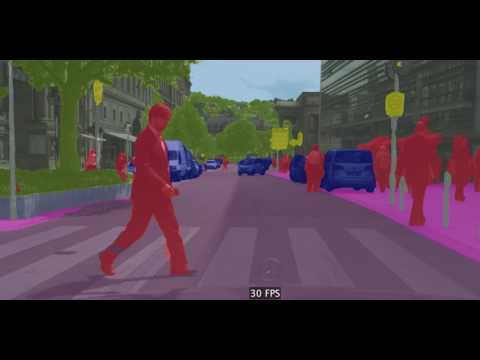

In [ ]:
from IPython.display import YouTubeVideo
start=int(timedelta(hours=0, minutes=0, seconds=10).total_seconds())
YouTubeVideo("qWl9idsCuLQ", start=start, autoplay=1, theme="light", color="red", width=1024, height=576)

<h1>Performance metric</h1><br>

[Reference](https://medium.com/@karan_jakhar/100-days-of-code-day-7-84e4918cb72c)

<ol> <li><b>Dice coefficient</li></b><br> The Dice coefficient can be used to compare the pixel-wise agreement between a predicted segmentation and its corresponding ground truth. The formula is given by:<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<img src="https://miro.medium.com/max/131/1*m6VOcfgxiEDT_zMpOV5oAQ.png"/><br>
<img src="https://miro.medium.com/max/429/1*yUd5ckecHjWZf6hGrdlwzA.png"/><br>
where X is the predicted set of pixels and Y is the ground truth. The Dice coefficient is defined to be 1 when both X and Y are empty.<br>


<li><b>Binary Cross-Entropy </b></li><br>
the loss function  is defined as <br>
<img src="https://miro.medium.com/max/548/1*rdBw0E-My8Gu3f_BOB6GMA.png"/><br>
where y is the label (1 for poistive class  and 0 for negative class) and p(y) is the predicted probability of the point being positive for all N points.<br>
<li> <b>Recall</li></b><br>Recall calculates the percentage of actual positives a model correctly identified (True Positive). When the cost of a false negative is high, we should use recall.<br>
<img src="https://miro.medium.com/max/522/1*I0Yd-o2yQsHBRKFbf0rjpQ.png"/><br> </ol><br>




In [ ]:
# Mounting to google drive so that we can use GDrive to read and store the data
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir('/content/gdrive/My Drive/uploaded files/pneumothorax/Kaggle Data/')

Mounted at /content/gdrive


# Download the data from Kaggle using kaggle API
Reference :  https://www.kaggle.com/general/74235

In [ ]:
# ! pip install -q kaggle
# from google.colab import files
# files.upload() # Choose the kaggle.json file that you downloaded
# ! mkdir ~/.kaggle # Make directory named kaggle and copy kaggle.json file there.
# ! cp kaggle.json ~/.kaggle
# ! chmod 600 ~/.kaggle/kaggle.json # Give read,write permission to ther user and no permission for all other user
# ! kaggle datasets download -d seesee/siim-train-test
# ! unzip -qq 'siim-train-test.zip' # Extracting file

# EDA

In [ ]:
from IPython.display import display, Image
! pip install pydicom
import pydicom
from glob import glob
from tqdm import tqdm
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import seaborn as sns
import random
import pickle
from matplotlib import patches 
import multiprocessing as mp
from multiprocessing import Pool
from datetime import datetime,timedelta
import plotly.graph_objects as go 
from functools import partial
pd.set_option('display.max_rows', 500)

     |████████████████████████████████| 1.9MB 8.4MB/s 


In [ ]:
# Declare Config variables 
TRAIN_DIR =  "./siim/dicom-images-train/" 
TEST_DIR = "./siim/dicom-images-test/" 

In [ ]:
class_df = pd.read_csv('./siim/train-rle.csv')
class_df.columns = ['ImageId', 'EncodedPixels']
print(class_df.info())
class_df.head()

<h2> Checking for NaN values

In [ ]:
print("No of Nan values in our dataframe : ", sum(class_df.isnull().any(axis=1)))

No of Nan values in our dataframe :  0
Columns that contains Nan values :  []


<h3> Checking Duplicates 

In [ ]:
dups = sum(class_df.duplicated())
print("There are {} duplicate entries in the data..".format(dups))

There are 0 duplicate entries in the data..


In [ ]:
# Let us investigate further
dups = sum(class_df.duplicated(['ImageId']))
print("There are {} duplicate ImageId in the data..".format(dups))

There are 907 duplicate ImageId in the data..


<b>Observation :</b>It means some there are 907 imgaes that have multiple annotaions

# <h3>  Basic Statistics

In [ ]:
print("Total unique data points : {0}".format(class_df.shape[0]))
print("-"*50)

Total unique data points : 12954
--------------------------------------------------


In [ ]:
# files  = sorted(glob(TRAIN_DIR + "*/*/*.dcm"))
def get_list_of_files(dir_name):
    '''
        For the given path, get the List of all files in the directory tree 
        INPUT:
            dir_name - path to the directory where files to be searched
        OUTPUT:
            list containing full path of all files present inside input directory
    '''
    # names in the given directory 
    list_of_files = os.listdir(dir_name)
    all_files = []
    for entry in list_of_files:
        full_path = os.path.join(dir_name,entry)
        if os.path.isdir(full_path):
            all_files = all_files + get_list_of_files(full_path)
        else:
            all_files.append(full_path)
    return all_files
# train_files  = sorted(get_list_of_files(TRAIN_DIR))
#test_files = sorted(get_list_of_files(TEST_DIR))

In [ ]:
# with open('train_files.pkl', 'wb') as f:
#     pickle.dump(train_files, f)
with open('train_files.pkl', 'rb') as f:
    train_files = pickle.load(f)

There are 12089 files in train data and 3205 files in test data



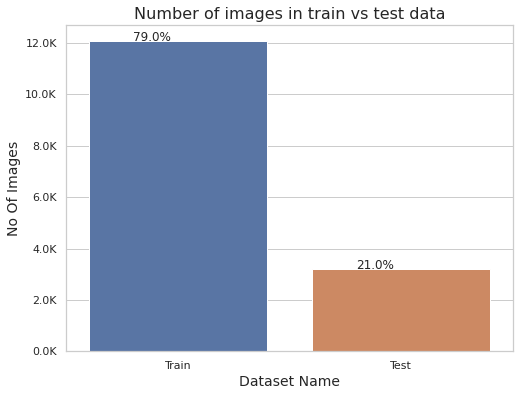

In [ ]:
print("There are {0} files in train data and {1} files in test data\n".format(len(train_files),len(test_files)))
sns.set(style='whitegrid')
plt.figure(figsize=(8,6))
#colors = ['blue','orange']
ax = sns.barplot(x = ['Train','Test'],y = [len(train_files),len(test_files)])
plt.title("Number of images in train vs test data",size=16)
plt.xlabel('Dataset Name',size=14)
plt.ylabel('No Of Images',size=14)
total = len(train_files) + len(test_files)
for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/total),(p.get_x()+0.2,p.get_height()+5))
ylabels = list(map(lambda x : '{:.1f}'.format(x/10**3) + 'K', list(ax.get_yticks())))
ax.set_yticklabels(ylabels)
plt.show()  

<h3> Class distribution in train data

There are 3576 data points that are Pneumothorax positive and 9378 data points that are Pneumothorax negative



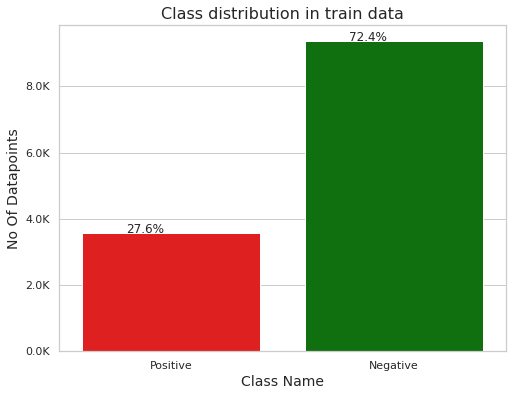

In [ ]:
# Images without pneumothorax have a mask value of -1.
neg = class_df.query('EncodedPixels == "-1"').shape[0]
pos = class_df.shape[0] - neg
print("There are {0} data points that are Pneumothorax positive and {1} data points that are Pneumothorax negative\n".format(pos,neg))
sns.set(style='whitegrid')
plt.figure(figsize=(8,6))
colors = ['red','green']
ax = sns.barplot(x = ['Positive','Negative'],y = [pos,neg],palette=colors)
plt.title("Class distribution in train data",size=16)
plt.xlabel('Class Name',size=14)
plt.ylabel('No Of Datapoints',size=14)
total = class_df.shape[0]
for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/total),(p.get_x()+0.2,p.get_height()+5))
ylabels = list(map(lambda x : '{:.1f}'.format(x/10**3) + 'K', list(ax.get_yticks())))
ax.set_yticklabels(ylabels)
plt.show()  

<b>Observation :</b> The data is imbalanced and there are only 27.6% of positive cases.

We have images in .dcm format which contains image and metadata of image both. For EDA we can use the meta data<br>
References :<br>
https://pydicom.github.io/pydicom/stable/auto_examples/input_output/plot_read_dicom.html <br>
https://www.kaggle.com/schlerp/getting-to-know-dicom-and-the-data/notebook <br>
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Rectangle.html

In [ ]:
# The below two functions have been given by organizers in the data section in mask_functions.py
def mask2rle(img, width, height):
    rle = []
    lastColor = 0;
    currentPixel = 0;
    runStart = -1;
    runLength = 0;

    for x in range(width):
        for y in range(height):
            currentColor = img[x][y]
            if currentColor != lastColor:
                if currentColor == 255:
                    runStart = currentPixel;
                    runLength = 1;
                else:
                    rle.append(str(runStart));
                    rle.append(str(runLength));
                    runStart = -1;
                    runLength = 0;
                    currentPixel = 0;
            elif runStart > -1:
                runLength += 1
            lastColor = currentColor;
            currentPixel+=1;

    return " ".join(rle)

def rle2mask(rle, width, height):
    '''
        Converts rel encoded pixel to image of size width x height
        Example, rle '1 3 10 5' implies pixels 1,2,3 are to be included in the mask, as well as 14,15,16,17,18.
        Args:
            rle : encoded pixel in rel form
            width : width of image
            height : height of image
        Returns:
            decoded image masks
    '''
    mask= np.zeros(width* height)
    array = np.asarray([int(x) for x in rle.split()])
    starts = array[0::2]
    lengths = array[1::2]

    current_position = 0
    for index, start in enumerate(starts):
        current_position += start
        mask[current_position:current_position+lengths[index]] = 255
        current_position += lengths[index]
    
    return mask.reshape(width, height)

In [ ]:
# Define utility function to read the meta data of .dcm files
def show_dcm_info(dataset,file_path):
    '''
        Shows the meta data info of images
        Args:
            dataset : A dataset object after reading through pydicom library, it stored in accordance with the DICOM File Format
            file_path : full file path of the image
        Returns:
            None
    '''
    print("Filename.........:", file_path.split('/')[-1])
    print("Storage type.....:", dataset.SOPClassUID)
    print()

    pat_name = dataset.PatientName
    display_name = pat_name.family_name + ", " + pat_name.given_name
    print("Patient's name......:", display_name)
    print("Patient id..........:", dataset.PatientID)
    print("Patient's Age.......:", dataset.PatientAge)
    print("Patient's Sex.......:", dataset.PatientSex)
    print("Modality............:", dataset.Modality)
    print("Body Part Examined..:", dataset.BodyPartExamined)
    print("View Position.......:", dataset.ViewPosition)
    
    if 'PixelData' in dataset:
        rows = int(dataset.Rows)
        cols = int(dataset.Columns)
        print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
            rows=rows, cols=cols, size=len(dataset.PixelData)))
        if 'PixelSpacing' in dataset:
            print("Pixel spacing....:", dataset.PixelSpacing)
            
# function to plot the images 
def plot_pixel_array(dataset, figsize=(10,10)):
    '''
        Plots The pixel array present in dataset object
        Args: 
            dataset : A dataset object after reading through pydicom library, it stored in accordance with the DICOM File Format
            figsize :  Size of figure object to plot
        Returns:
            None   
    '''
    #print(type(dataset.pixel_array))
    plt.figure(figsize=figsize)
    plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
    plt.show()
def bounding_box(img):
    '''
        Determines the where the bounding box needs to be drawn around the mask
        Args:
            img : Decoded image masks
        Returns:
            rmin : minimum pixel row value of the mask
            rmax : maximum pixel row value of the mask
            cmin: minimum pixel column value of the mask
            cmax: maximum pixel column value of the mask

    '''
    rows = np.any(img, axis=1)
    cols = np.any(img, axis=0)
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]

    return rmin, rmax, cmin, cmax

def plot_with_mask_and_bbox(dataset, mask_encoded, figsize=(20,10)):
    '''
        Plots images without and with Masks surrounded by red bounding box
         Args: 
            dataset : A dataset object after reading through pydicom library, it stored in accordance with the DICOM File Format
            mask_encoded : rele encoded masks of images
            figsize :  Size of figure object to plot
        Returns:
            None   
    '''
    mask_decoded = rle2mask(mask_encoded, 1024, 1024).T
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(20,10))
    rmin, rmax, cmin, cmax = bounding_box(mask_decoded)
    patch = patches.Rectangle((cmin,rmin),cmax-cmin,rmax-rmin,linewidth=1,edgecolor='r',facecolor='none')
    ax[0].imshow(dataset.pixel_array, cmap=plt.cm.bone)
    ax[0].imshow(mask_decoded, alpha=0.3, cmap="Reds")
    ax[0].add_patch(patch)
    ax[0].set_title('With Mask')
    patch = patches.Rectangle((cmin,rmin),cmax-cmin,rmax-rmin,linewidth=1,edgecolor='r',facecolor='none')
    ax[1].imshow(dataset.pixel_array, cmap=plt.cm.bone)
    ax[1].add_patch(patch)
    ax[1].set_title('Without Mask')
    plt.show()

Filename.........: 1.2.276.0.7230010.3.1.4.8323329.5322.1517875187.606898.dcm
Storage type.....: 1.2.840.10008.5.1.4.1.1.7

Patient's name......: 651edfec-1612-4220-9d6f-393bf25ce894, 
Patient id..........: 651edfec-1612-4220-9d6f-393bf25ce894
Patient's Age.......: 53
Patient's Sex.......: M
Modality............: CR
Body Part Examined..: CHEST
View Position.......: PA
Image size.......: 1024 x 1024, 150792 bytes
Pixel spacing....: [0.14300000000000002, 0.14300000000000002]
<class 'numpy.ndarray'>


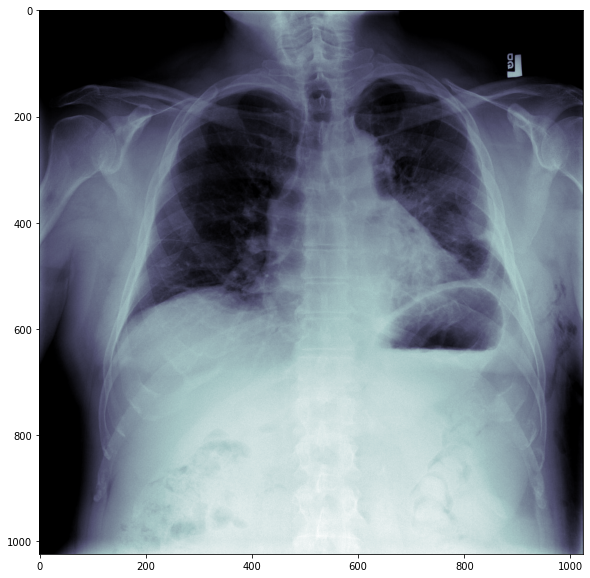

Filename.........: 1.2.276.0.7230010.3.1.4.8323329.5227.1517875187.86095.dcm
Storage type.....: 1.2.840.10008.5.1.4.1.1.7

Patient's name......: d323adaa-9e62-4292-a61d-2fbbd9a3c5fc, 
Patient id..........: d323adaa-9e62-4292-a61d-2fbbd9a3c5fc
Patient's Age.......: 55
Patient's Sex.......: F
Modality............: CR
Body Part Examined..: CHEST
View Position.......: AP
Image size.......: 1024 x 1024, 107814 bytes
Pixel spacing....: [0.168, 0.168]
<class 'numpy.ndarray'>


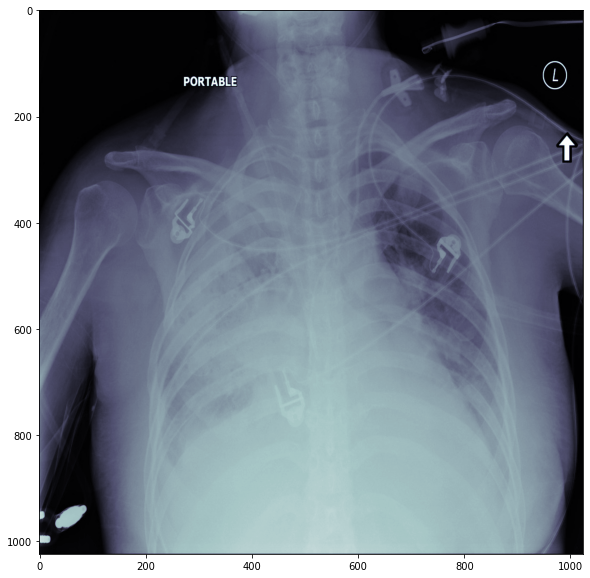

Filename.........: 1.2.276.0.7230010.3.1.4.8323329.14511.1517875252.461370.dcm
Storage type.....: 1.2.840.10008.5.1.4.1.1.7

Patient's name......: 5aef35db-f16e-4636-89b7-0fcfebc10746, 
Patient id..........: 5aef35db-f16e-4636-89b7-0fcfebc10746
Patient's Age.......: 62
Patient's Sex.......: M
Modality............: CR
Body Part Examined..: CHEST
View Position.......: PA
Image size.......: 1024 x 1024, 152962 bytes
Pixel spacing....: [0.14300000000000002, 0.14300000000000002]
<class 'numpy.ndarray'>


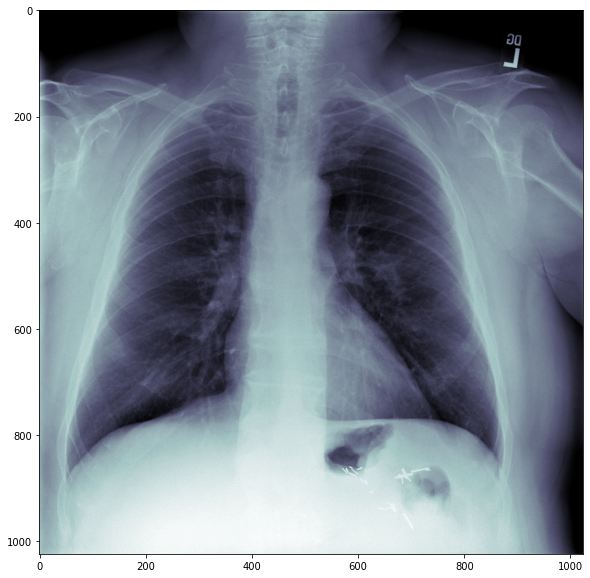

Filename.........: 1.2.276.0.7230010.3.1.4.8323329.4865.1517875185.161274.dcm
Storage type.....: 1.2.840.10008.5.1.4.1.1.7

Patient's name......: 964ea810-99e7-4c8d-8661-d23c831b6614, 
Patient id..........: 964ea810-99e7-4c8d-8661-d23c831b6614
Patient's Age.......: 57
Patient's Sex.......: F
Modality............: CR
Body Part Examined..: CHEST
View Position.......: AP
Image size.......: 1024 x 1024, 169886 bytes
Pixel spacing....: [0.139, 0.139]
<class 'numpy.ndarray'>


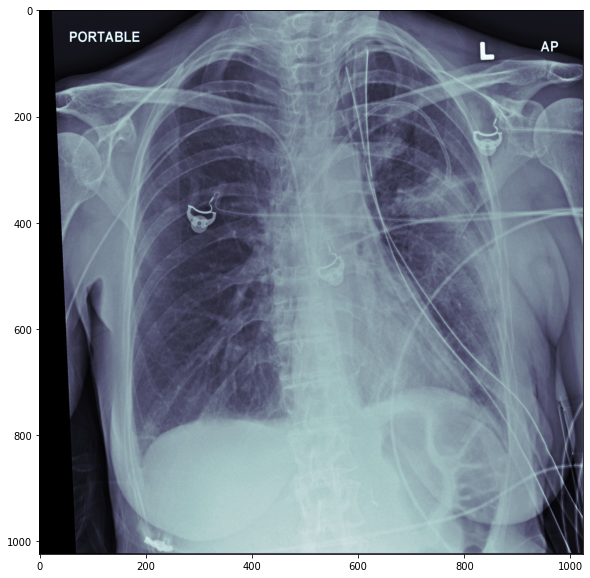

Filename.........: 1.2.276.0.7230010.3.1.4.8323329.5971.1517875193.313021.dcm
Storage type.....: 1.2.840.10008.5.1.4.1.1.7

Patient's name......: 07468661-e341-464d-af16-711f872a9972, 
Patient id..........: 07468661-e341-464d-af16-711f872a9972
Patient's Age.......: 15
Patient's Sex.......: M
Modality............: CR
Body Part Examined..: CHEST
View Position.......: AP
Image size.......: 1024 x 1024, 101342 bytes
Pixel spacing....: [0.168, 0.168]
<class 'numpy.ndarray'>


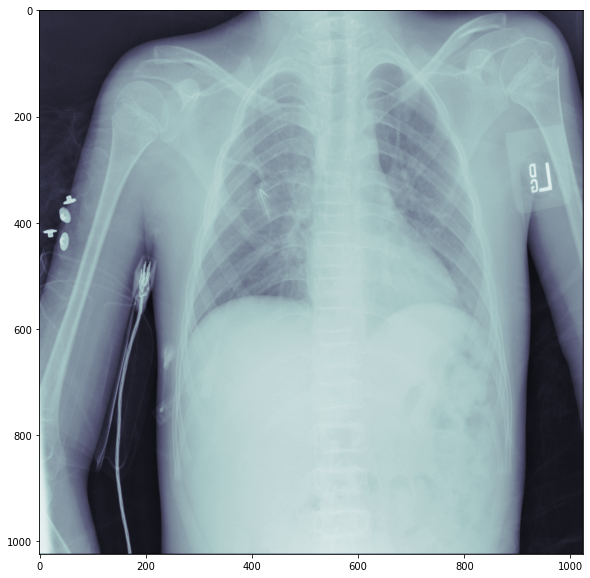

In [ ]:
 # lets look at some of the DICOM images 
no_to_plot = 5
for i in range(no_to_plot):
    file = train_files[random.randint(0,len(train_files))]
    dataset = pydicom.dcmread(file)
    show_dcm_info(dataset,file)
    plot_pixel_array(dataset)

In [ ]:
def show_image_with_Pneumothorax(class_df,files,no_to_plot=1):
    '''
        This function will randomly picks up images with Pneumothorax present and shows metadata and images with bounding box
        Args:
            class_df :  DF containing the labels of each image
            files : Path of image files 
            no_to_plot : number of images with Pneumothorax to plot
    '''
    ids = class_df.query('EncodedPixels != "-1"').index.to_list()
    for i in range(no_to_plot):
        id = random.choice(ids)
        img = class_df.loc[id,'ImageId']
        mask_encoded = class_df.loc[id,'EncodedPixels']
        file = list(filter(lambda x: os.path.splitext(x.split('/')[-1])[0] == img ,files))[0]
        dataset = pydicom.dcmread(file)
        show_dcm_info(dataset,file)
        plot_with_mask_and_bbox(dataset, mask_encoded)

Filename.........: 1.2.276.0.7230010.3.1.4.8323329.31823.1517875157.41461.dcm
Storage type.....: 1.2.840.10008.5.1.4.1.1.7

Patient's name......: e38f6824-cf28-41c1-b4d7-fc6ea91d5ca9, 
Patient id..........: e38f6824-cf28-41c1-b4d7-fc6ea91d5ca9
Patient's Age.......: 30
Patient's Sex.......: M
Modality............: CR
Body Part Examined..: CHEST
View Position.......: AP
Image size.......: 1024 x 1024, 168534 bytes
Pixel spacing....: [0.139, 0.139]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[False False False ... False False False]


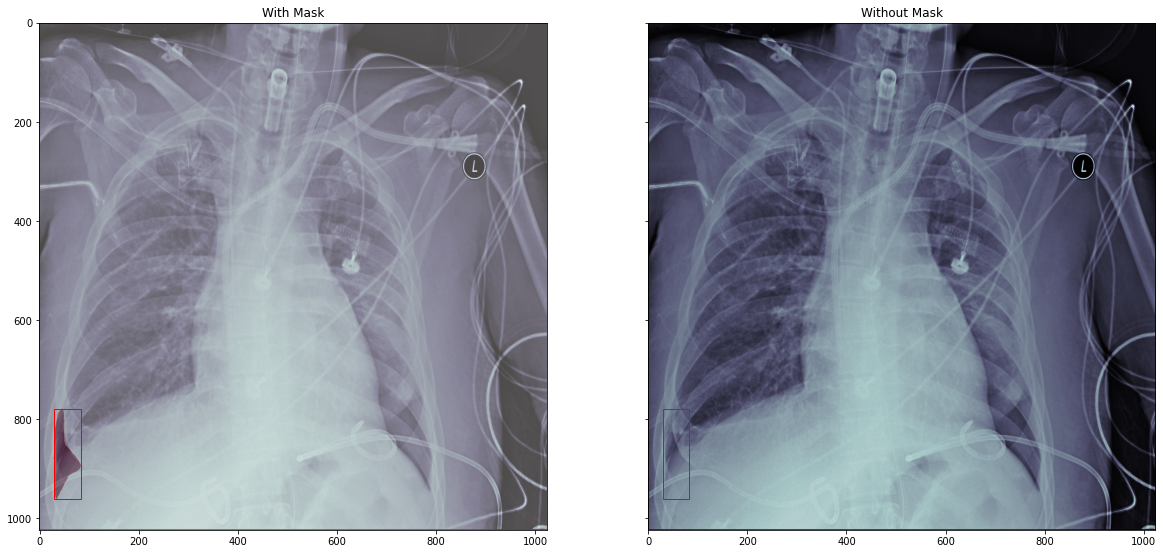

In [ ]:
show_image_with_Pneumothorax(class_df,train_files,1)

In [ ]:
def extract_metadata_from_images(file_path):
    dataset = pydicom.dcmread(file_path)
    d = {}
    d['ImageID'] = os.path.splitext(file_path.split('/')[-1])[0] # Exculding the format (.dcm)
    d['patientID'] = dataset.PatientID
    d['age'] = dataset.PatientAge
    d['sex'] = dataset.PatientSex
    d['view_position'] = dataset.ViewPosition
    d['pixel_spacing']  = dataset.PixelSpacing
    d["modality"] = dataset.Modality
    d["body_part_examined"] =  dataset.BodyPartExamined
    d['pixel_mean'] =  np.mean(dataset.pixel_array)
    d['pixel_min'] =  np.min(dataset.pixel_array)
    d['pixel_max'] =  np.max(dataset.pixel_array)
    return d

In [ ]:
start = datetime.now()
num_cores = mp.cpu_count()
pool = Pool(num_cores)
results = pool.map(extract_metadata_from_images,train_files)
pool.close()
print("Total time taken {0}".format(datetime.now() - start))

Total time taken 1:31:58.964880


In [ ]:
df_meta = pd.DataFrame(results)
df_meta.to_pickle('df_meta.pkl')

In [ ]:
df_meta = pd.read_pickle('df_meta.pkl')
df_meta = df_meta.merge(class_df , left_on = 'ImageID',right_on='ImageId' ,how='left')
nan_rows = df_meta[df_meta.ImageId.isna()]
print('There are {0} rows that does not have Class label'.format(nan_rows.shape[0]))
# Dropping nan rows
df_meta.dropna(subset = ['ImageId'],inplace= True)
# Drop duplicates
df_meta.drop_duplicates(subset = ['ImageId'],inplace=True)
# Adding a column to differentiate rows with and without Pneumothorax
df_meta['class_'] = 'Pneumothorax'
df_meta.loc[df_meta['EncodedPixels'] == "-1",'class_'] = 'NotPneumothorax'
# Casting ages as int
df_meta['age'] = df_meta['age'].astype(int)

There are 42 rows that does not have Class label


In [ ]:
df_meta.head(2)

ImageID  ...        class_
0  1.2.276.0.7230010.3.1.4.8323329.32762.15178751...  ...  Pneumothorax
1  1.2.276.0.7230010.3.1.4.8323329.6141.151787519...  ...  Pneumothorax

[2 rows x 14 columns]

There are 6626 Males and 5421 females 


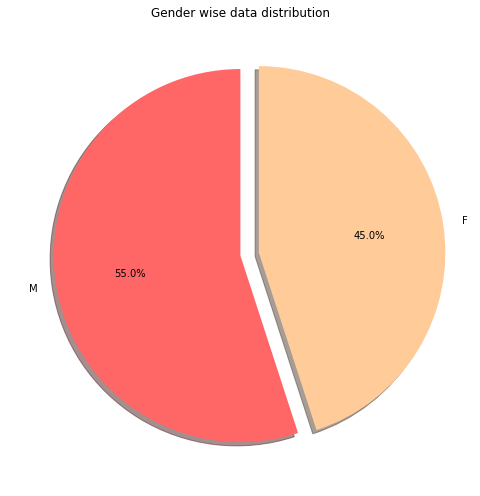

In [ ]:
fig = plt.figure(figsize =(7, 7)) 
gender = df_meta.sex.value_counts()
gender_healthy = df_meta.query('EncodedPixels == "-1"').sex.value_counts()
gender_affected = df_meta.query('EncodedPixels !="-1"').sex.value_counts()
print("There are {0} Males and {1} females ".format(gender['M'],gender['F']))
explode = (0, 0.1)  # explode the 2nd slice
ax = plt.pie(gender.values, labels = gender.keys(),explode=explode, autopct='%1.1f%%',shadow=True,startangle=90,colors = ['#ff6666', '#ffcc99']) 
plt.title("Gender wise data distribution")
plt.tight_layout()
plt.show()

<b>Observation </b> There are more male person data than female person

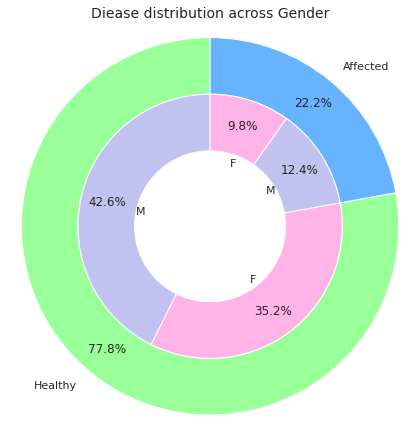

In [ ]:
#Reference : https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/nested_pie.html
#            https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.pie.html
fig = plt.figure(figsize =(6, 6))
ax = fig.add_subplot()
size = 0.3
outer_colors = ['#99ff99', '#66b3ff','#ff6666', '#ffcc99']
inner_colors = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
outer = [gender_healthy.sum(),gender_affected.sum()]
ax.pie(outer,labels= ['Healthy','Affected'], radius=1,colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.1f%%',pctdistance=0.85,startangle=90)
inner = gender_healthy.to_list()
inner.extend(gender_affected.to_list())
ax.pie(inner,labels = ['M','F','M','F'], radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w') ,autopct='%1.1f%%',shadow=True,startangle=90,pctdistance=0.8, labeldistance=0.5)

centre_circle = plt.Circle((0, 0), 0.4, color='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
        
plt.axis('equal')
plt.tight_layout()
plt.title("Diease distribution across Gender",size=14)
plt.show()

<b>Observation </b>  Men and women are equally likely to be affected by Pneumothorax.

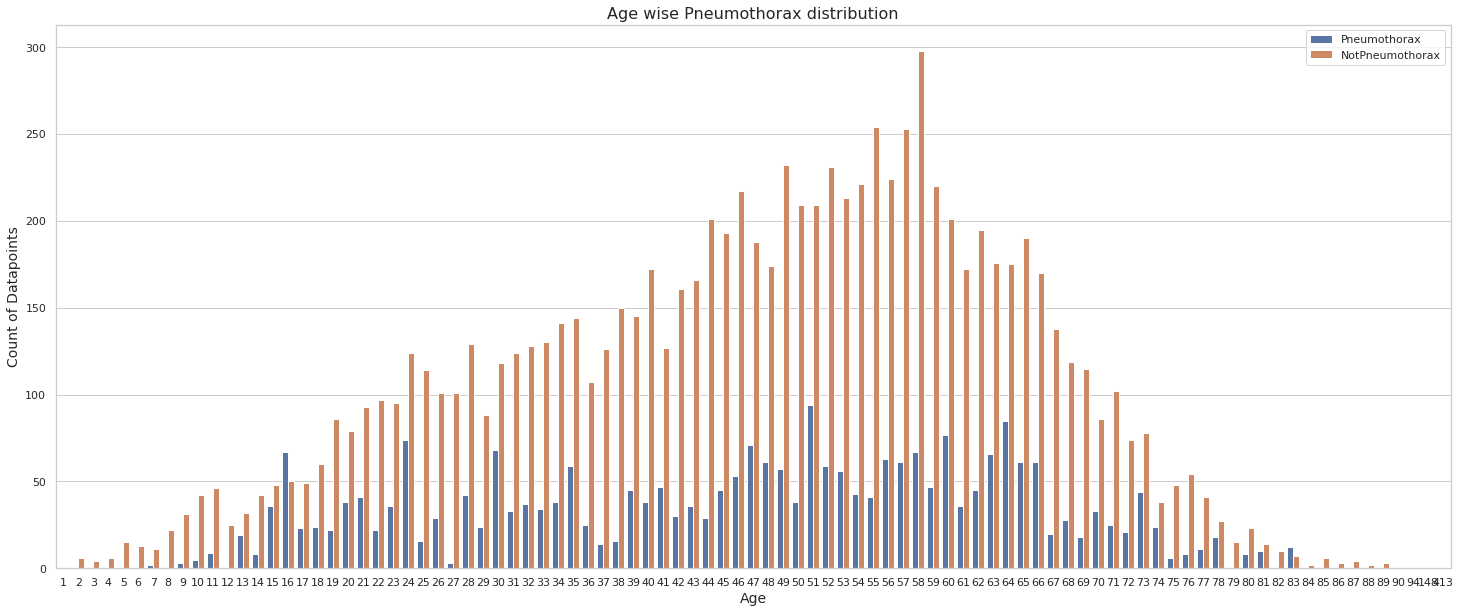

In [ ]:
plt.figure(figsize=(25,10))
ax = sns.countplot(x ='age' ,hue='class_',data = df_meta)
plt.title("Age wise Pneumothorax distribution",size=16)
plt.xlabel('Age',size=14)
plt.ylabel('Count of Datapoints',size=14)
total = df_meta.shape[0]
# for p in ax.patches[::4]:
#     ax.annotate('{:.1f}%'.format(100*p.get_height()/total),(p.get_x()+0.2,p.get_height()+5))
# locs, labels = plt.xticks()
# plt.xticks(locs[::2], labels[::2])
plt.legend(loc='upper right')
plt.show()

<b>Observation </b> The above diagram clearly shows people from different ages can be affected by Pneumothorax. However as per dataset people of age 51 is highly affected by the the disease than others.

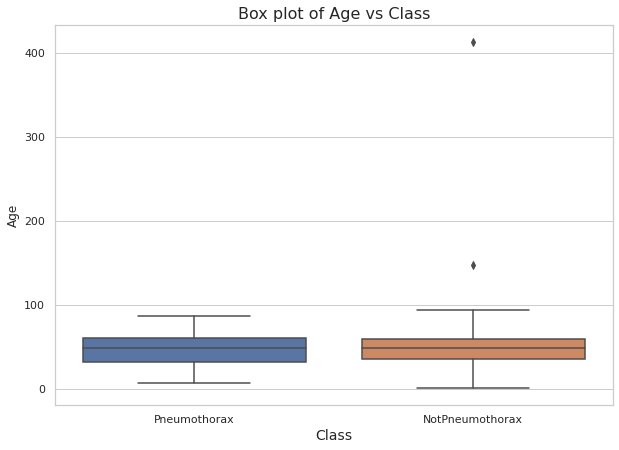

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,7))
ax = sns.boxplot(x='class_',y='age',data=df_meta)
plt.xlabel('Class',size=14)
plt.ylabel('Age',size=12)
plt.title("Box plot of Age vs Class",size=16)
plt.show()

<b>Observation </b> Similar conclusions as above can be drawn here.People of all ages can be affected by the disease. We can clearly see 2 outliers in the age 148 and 413.

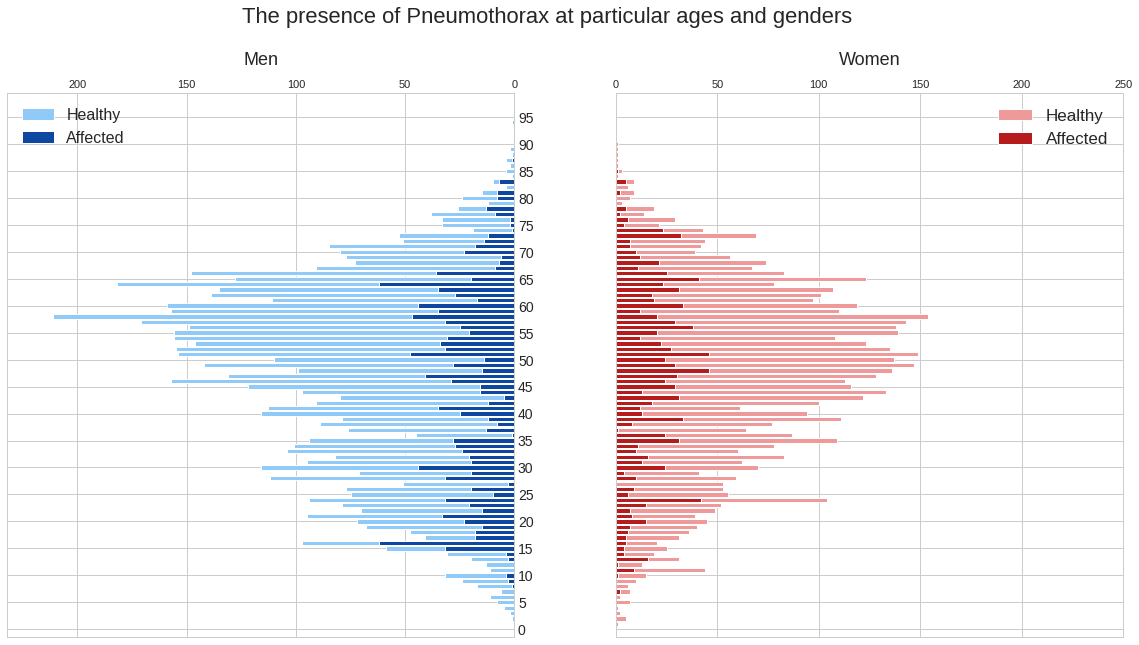

In [ ]:
#calculating all and ill men and women histograms
bins = [i for i in range(100)]
plt.style.use('seaborn-whitegrid')
all_men = np.histogram(df_meta.query('sex == "M"')["age"].values, bins=bins)[0]
all_women = np.histogram(df_meta.query('sex == "F"')["age"].values, bins=bins)[0]
ill_men = np.histogram(df_meta.query('sex == "M" and class_ == "Pneumothorax"')["age"].values, bins=bins)[0]
ill_women = np.histogram(df_meta.query('sex == "F" and class_ == "Pneumothorax"')["age"].values, bins=bins)[0]
fig, axes = plt.subplots(1, 2,sharey=True,figsize=(20,10))
fig.suptitle("The presence of Pneumothorax at particular ages and genders", fontsize=22, y=1)
axes[0].margins(x=0.1, y=0.01)
m1 = axes[0].barh(bins[:-1], all_men, color='#90CAF9')
m2 = axes[0].barh(bins[:-1], ill_men, color='#0D47A1')
axes[0].set_title('Men', fontsize=18, pad=15)
axes[0].invert_xaxis()
axes[0].set(yticks=[i*5 for i in range(20)])
axes[0].tick_params(axis="y", labelsize=14)
axes[0].yaxis.tick_right()
axes[0].xaxis.tick_top()
axes[0].legend((m1[0], m2[0]), ('Healthy', 'Affected'), loc=2, prop={'size': 16})
locs = axes[0].get_xticks()

axes[1].margins(y=0.01)
w1 = axes[1].barh(bins[:-1], all_women, color='#EF9A9A')
w2 = axes[1].barh(bins[:-1], ill_women, color='#B71C1C')
axes[1].set_title('Women', fontsize=18, pad=15)
axes[1].xaxis.tick_top()
axes[1].set_xticks(locs)
axes[1].legend((w1[0], w2[0]), ('Healthy', 'Affected'), prop={'size': 17})
plt.show()

<b>Observation </b> The healthy people distribution is very similar to gaussian distribution but not exactly same. Men of age 15 are affetced as men of age 65. 

There are 7274 PA view_position and 4773 AP view_position 


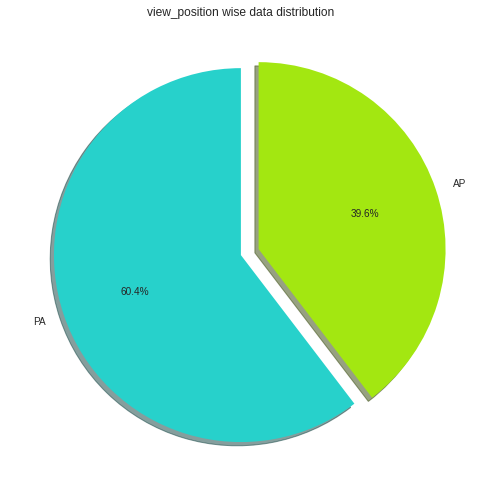

In [ ]:
fig = plt.figure(figsize =(7, 7)) 
view_position = df_meta.view_position.value_counts()
view_position_healthy = df_meta.query('EncodedPixels == "-1"').view_position.value_counts()
view_position_affected = df_meta.query('EncodedPixels !="-1"').view_position.value_counts()
print("There are {0} PA view_position and {1} AP view_position ".format(view_position['PA'],view_position['AP']))
explode = (0, 0.1)  # explode the 2nd slice
ax = plt.pie(view_position.values, labels = view_position.keys(),explode=explode, autopct='%1.1f%%',shadow=True,startangle=90,colors = ['#27d1cb', '#a3e711']) 
plt.title("view_position wise data distribution")
plt.tight_layout()
plt.show()


<b>Observation </b> There are more X-ray images done in PA position than AP which is quite natural as if PA is not possible for a patient due some reason then doctors prefer to do AP.

<h3>  Analysing The Affected Area¶

In the metadata of images we don't have the area affected by Pneumothorax. However from the masking information we can approximate the area. We convert rle encoded masks to image form.Then we will count the non zero elements in this array to count the number of pixels we have. Pixel spacing gives us the length and width of patient's chest per pixel. We will multiply the area per pixel driven of pixel spacing by total number of pixels to get an estimation of the affected area in sq mm.

In [ ]:
def get_affected_area(row):
    '''
        Estimates affected are by Pneumothorax.
        Args:
            row : A single row of DF
    '''
    #print(row.EncodedPixels,row.pixel_spacing)
    encoded_pixels, pixel_spacing = row.EncodedPixels,row.pixel_spacing
    # take the encoded mask, decode, and get the sum of nonzero elements
    pixel_sum = 0
    mask_decoded = rle2mask(encoded_pixels, 1024, 1024).T
    pixel_sum += np.count_nonzero(mask_decoded)
        
    area_per_pixel = pixel_spacing[0] * pixel_spacing[1]
    
    return pixel_sum * area_per_pixel


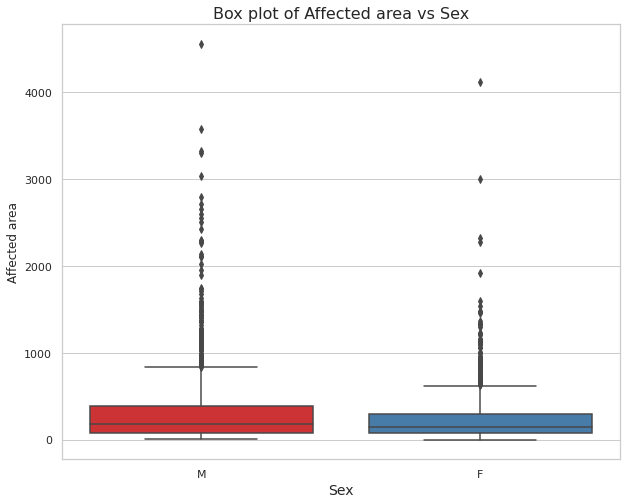

In [ ]:
df_affected = df_meta.query('class_ == "Pneumothorax"').copy()
df_affected['affected_area'] = df_affected.apply(lambda row : get_affected_area(row),axis=1)
area_men = df_affected.query('sex == "M"')
area_women = df_affected.query('sex == "F"')
sns.set(style='whitegrid')
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='sex',y='affected_area',data=df_affected,palette="Set1")
#ax.margins(y=0.1)
plt.xlabel('Sex',size=14)
plt.ylabel('Affected area',size=12)
plt.title("Box plot of Affected area vs Sex",size=16)
plt.show()

<b>Observation </b> It is clear that the affected area for Men is more than Females as median, Q3, IQR, end whisker are larger for men than females. There are lot of outliers also for both cases.<br>
Let us divide the people in different age categories and see how the disease affects different age groups

In [ ]:
def age_categories(age):
    '''
        This function calculates different age categories based on age 
    '''
    if age <= 14:
        return 'Child'
    if age >=15 and age <= 24:
        return 'Youth'
    if age >=25 and age <=64:
        return 'Adult'
    if age >= 65:
        return 'Senior'
# get age categories
df_affected['age_category'] = df_affected['age'].apply(age_categories)

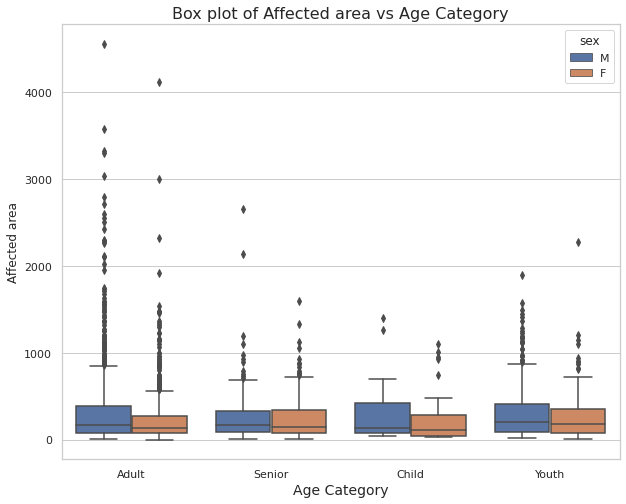

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='age_category',y='affected_area',hue='sex',data=df_affected)
#ax.margins(y=0.1)
plt.xlabel('Age Category',size=14)
plt.ylabel('Affected area',size=12)
plt.title("Box plot of Affected area vs Age Category",size=16)
plt.show()

<b>Observation </b> For youth the affected area is higher as median is higher. For children the affected area is smaller than others. Except seniors the IQR for male is higher than females.

In [ ]:
df_meta.modality.value_counts()

CR    12047
Name: modality, dtype: int64

<b>Observation </b> We have only one value of modality CR(Computed Radiography).

In [ ]:
df_meta.body_part_examined.value_counts()

CHEST    12047
Name: body_part_examined, dtype: int64

<b>Observation </b> For all images body part examined is chest which is obvious.

In [ ]:
# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'
# Larger scale for plots in notebooks
sns.set_context('notebook')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Enable multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Preprocessing

Processing images

In [ ]:
def convert_to_png(file,folder):
    dataset = pydicom.dcmread(file)
    img = dataset.pixel_array
    f_name = os.path.splitext(file.split('/')[-1])[0] # Exculding the format (.dcm)
    cv2.imwrite(folder + "/" + f_name + ".png", img)

In [ ]:
def preprocess_files(files,folder):
    start = datetime.now()
    num_cores = mp.cpu_count()
    pool = Pool(num_cores)
    func = partial(convert_to_png,folder = folder) # convert_to_png has only one argument file (folder is fixed)
    results = pool.map(func,files)
    pool.close()
    print("Total time taken {0}".format(datetime.now() - start))
preprocess_files(train_files,'./train_png')
preprocess_files(test_files,'./test_png')

Total time taken 1:08:51.603087


In [ ]:
# Declare Config variables 
TRAIN_DIR_PNG =  "./train_png/" 
TEST_DIR_PNG  = "./test_png/" 
#train_files_png  = sorted(get_list_of_files(TRAIN_DIR_PNG))
test_files_png = sorted(get_list_of_files(TEST_DIR_PNG))

In [ ]:
df_temp = pd.DataFrame(train_files_png, columns =['ImagePath'])
df_temp['ImageID'] = df_temp['ImagePath'].apply(lambda x : os.path.splitext(str(x).split('/')[-1])[0])
df_meta = df_meta.merge(df_temp,on='ImageID',how='inner')
# df_temp = pd.DataFrame(test_files_png)

Processing masks

In [ ]:
def preprocess_masks(df,folder):
    for row in tqdm(df.itertuples()):
        image_id = str(row.ImageID)
        mask_encoded = row.EncodedPixels
        if mask_encoded != "-1":
            mask_decoded = rle2mask(mask_encoded, 1024, 1024).T
        else:
            mask_decoded = np.zeros((1024, 1024))
        cv2.imwrite(folder + "/" + image_id + ".png", mask_decoded)
preprocess_masks(df_meta,'./mask_png')
df_meta['MaskPath'] = df_meta['ImagePath'].str.replace('train_png','mask_png')

12047it [03:15, 61.69it/s]


In [ ]:
df_meta_final = pd.read_pickle('df_meta_final.pkl')
df_meta_final['class_'] = df_meta_final['class_'].map({'Pneumothorax' :1 ,'NotPneumothorax' : 0})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_meta_final, df_meta_final['class_'],stratify =df_meta_final['class_'],  test_size=0.20, random_state=42)

In [ ]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in cross validation data:', X_test.shape[0])

Number of data points in train data: 9637
Number of data points in cross validation data: 2410


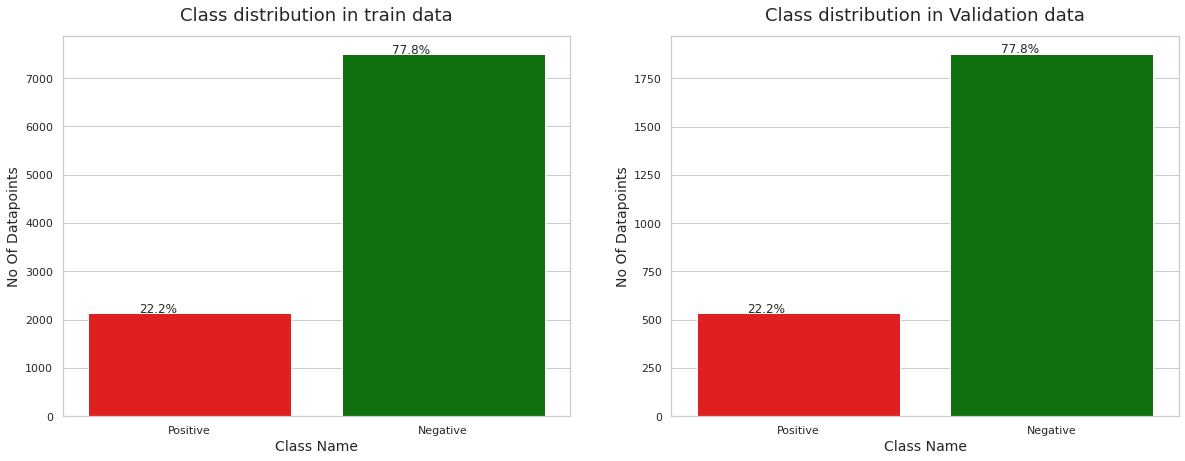

In [ ]:
fig, axes = plt.subplots(1, 2,figsize=(20,7))
train_class_distribution = X_train.class_.value_counts()
test_class_distribution = X_test.class_.value_counts()
sns.set(style='whitegrid')
colors = ['red','green']
colors = ['red','green']
sns.barplot(x = ['Positive','Negative'],y = [train_class_distribution[1],train_class_distribution[0]],palette=colors,ax=axes[0])
sns.barplot(x = ['Positive','Negative'],y = [test_class_distribution[1],test_class_distribution[0]],palette=colors,ax=axes[1])
axes[0].set_title('Class distribution in train data', fontsize=18, pad=15)
axes[0].set_xlabel('Class Name',size=14)
axes[1].set_title('Class distribution in Validation data', fontsize=18, pad=15)
axes[1].set_xlabel('Class Name',size=14)
axes[0].set_ylabel('No Of Datapoints',size=14)
axes[1].set_ylabel('No Of Datapoints',size=14)
total = [X_train.shape[0],X_test.shape[0]]
for i in range(2):
    for p in axes[i].patches:
        axes[i].annotate('{:.1f}%'.format(100*p.get_height()/total[i]),(p.get_x()+0.2,p.get_height()+5))
#plt.show()  